$$
\Large{\textbf{TP Optimisation - 2023}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1 : Remove noise from a signal

#### Question 1 :

Nous voulons réécrire $f(x) = \frac{1}{2}\sum_{i=1}^N(x_i-y_i)^2 + \frac{\lambda}{2}\sum_{i=1}^{N-1}(x_{i+1}-x_i)^2$ comme 
$\frac{1}{2}|| x - y ||^2 + \frac{\lambda}{2}||Dx||^2$, où $D \in \mathcal{M}_N(\mathbb{R})$.

Le premier terme est évident, car $\frac{1}{2}|| x - y ||^2 = \frac{1}{2}\sum_{i=1}^N(x_i-y_i)^2$.
Pour le deuxième terme, en prenant :
\begin{equation}
D = 
\begin{pmatrix}
-1&1&0&0&...&0 \\ 0&-1&1&0&...&0 \\ &&...&...&\\ 0&...&0&-1&1&0 \\ 0&...&0&0&-1&1 \\ 0&0&0&0&0&0
\end{pmatrix},
\end{equation}
On obtient : $||Dx||^2 = \sum_{i=1}^{N-1}(x_{i+1}-x_i)^2$, en prenant $||\cdot||^2$ comme la norme euclidienne usuelle.

In [2]:
def D_mat(N):
    D = np.diag(-1*np.ones(N))
    for i in range(N-1):
        D[i,i+1] = 1
    D[N-1,N-1]=0
    return D

In [3]:
D_mat(5)

array([[-1.,  1.,  0.,  0.,  0.],
       [ 0., -1.,  1.,  0.,  0.],
       [ 0.,  0., -1.,  1.,  0.],
       [ 0.,  0.,  0., -1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.]])

#### Question  2 :

La fonction $||\cdot||$ est différentiable, donc par somme de fonctions différentiables, $f(x) = \frac{1}{2}|| x - y ||^2 + \frac{\lambda}{2}||Dx||^2$ est bien différentiable.

Calcul du gradient : 

Soit $h \in \mathbb{R}^N$.

\begin{align}
f(x+h) &= \frac{1}{2}||x+h-y||^2+\frac{\lambda}{2}||D(x+h)||^2 \\
&= f(x) + \frac{1}{2} \bigg( \langle x-y,h \rangle + \langle h,x-y \rangle + ||h||^2 \bigg) + \frac{\lambda}{2} \bigg( \langle Dx,Dh\rangle + \langle Dh,Dx \rangle + ||Dh||^2 \bigg) \\
&= f(x) + \langle x-y,h \rangle + \lambda\langle Dx, Dh \rangle + \text{o}(||h||^2), \\
\text{D'où} \,\, f(x+h) &= f(x) + \langle x-y + \lambda D^TDx , h \rangle + \text{o}(||h||^2).
\end{align}

Donc on obtient $\nabla f(x) = x-y+\lambda D^TDx = \big(I_d - D^TD\big)x - y$.

In [4]:
def f(x):
    N = x.shape[0]
    return 1/2*np.linalg.norm(x-y) + lamb/2*np.linalg.norm(D_mat(N)@x)

In [5]:
def grad_f(x):
    N=x.shape[0]
    I = np.eye(N)
    return x + lamb*(D_mat(N).T@D_mat(N))@x - y

#### Question 3 :

In [6]:
N = 100

In [7]:
def generate_signal(N,sigma=0.05):
    
    t = np.linspace(0,1,N)
    t1 = 0.1+0.25*np.random.random()
    t2 = 0.35+0.25*np.random.random()
    yi = np.array([-0.1,0.8,0.2])
    
    y = np.zeros(N)
    
    for i in range(y.size):
        if t[i]<=t1:
            y[i]=yi[0]
        elif t[i]>t1 and t[i]<=t2:
            y[i] = yi[1]
        else:
            y[i] = yi[2]
    
    y += sigma*(2*np.random.random(y.size)-1)
    
    return t,y

In [8]:
t, y = generate_signal(N)

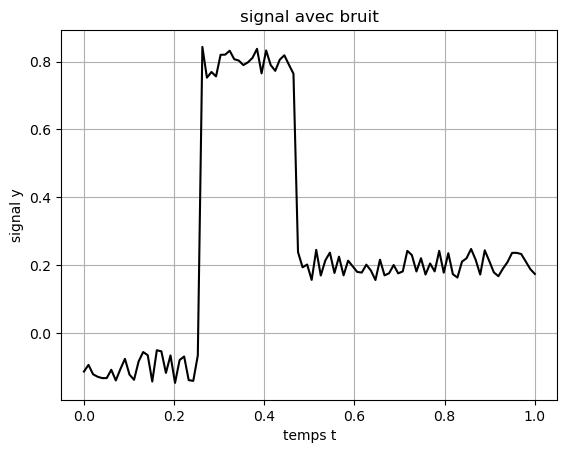

In [9]:
plt.plot(t, y, 'k-')
plt.grid(True)
plt.ylabel('signal y')
plt.xlabel('temps t')
plt.title('signal avec bruit');
plt.show()

#### Question 4 :

In [10]:
def gradient_met(grad_f, x0, alpha, eps, Nmax):

    """
    grad_f a function that compute the gradient of f given x
    x0 the initialization
    alpha the step (constant)
    eps the precision (stop criteria)
    Nmax the maximum number of iterations
    """
    
    x = x0
    gradf = grad_f(x)
    iters = 0
    
    while np.linalg.norm(gradf) > eps and iters < Nmax: #critere d’arret sur le gradient
        x = x - alpha*gradf
        gradf = grad_f(x)
        iters += 1
    
    cvg = np.linalg.norm(gradf) <= eps #on verifie si on a convergence
    
    return x, iters, cvg # returns
                    # x the minimum,
                    # n the number of iterations
                    # cvg a boolean that indicates if the algorithm has converged

#### Question 5 :

In [11]:
lamb = 1
x0 = y
alpha = 0.2

In [12]:
y_non_noise, it, cvg = gradient_met(grad_f, x0, alpha, 1e-8, 500)

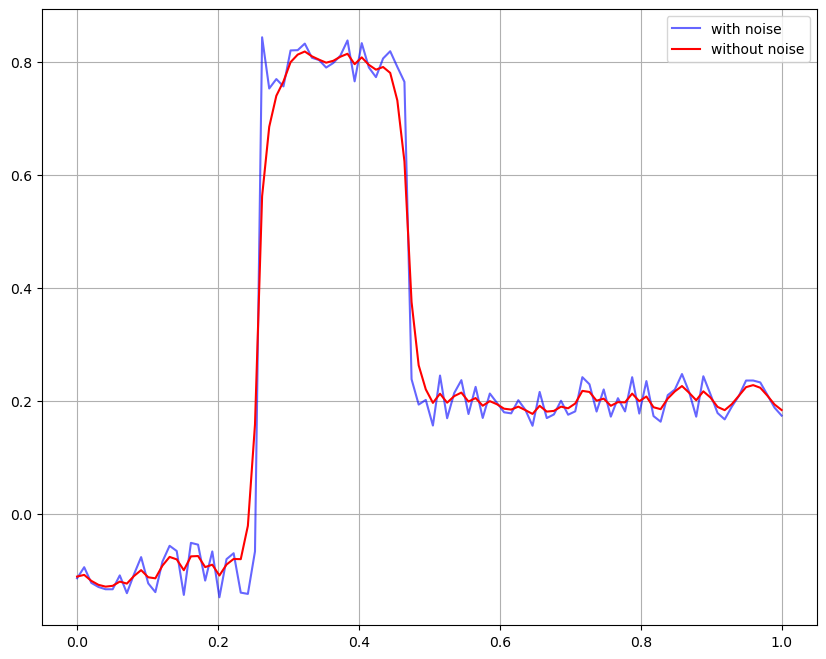

In [13]:
fig = plt.figure(figsize=(10,8))
plt.plot(t, y, 'b-', label = 'with noise', alpha = .6)
plt.plot(t, y_non_noise, 'r-', label = 'without noise')
plt.legend()
plt.grid(True)

#### Question 6 :

In [14]:
lamb, alpha = 1, 0.5
y_non_noise, it, cvg = gradient_met(grad_f, x0, alpha, 1e-5, 500)

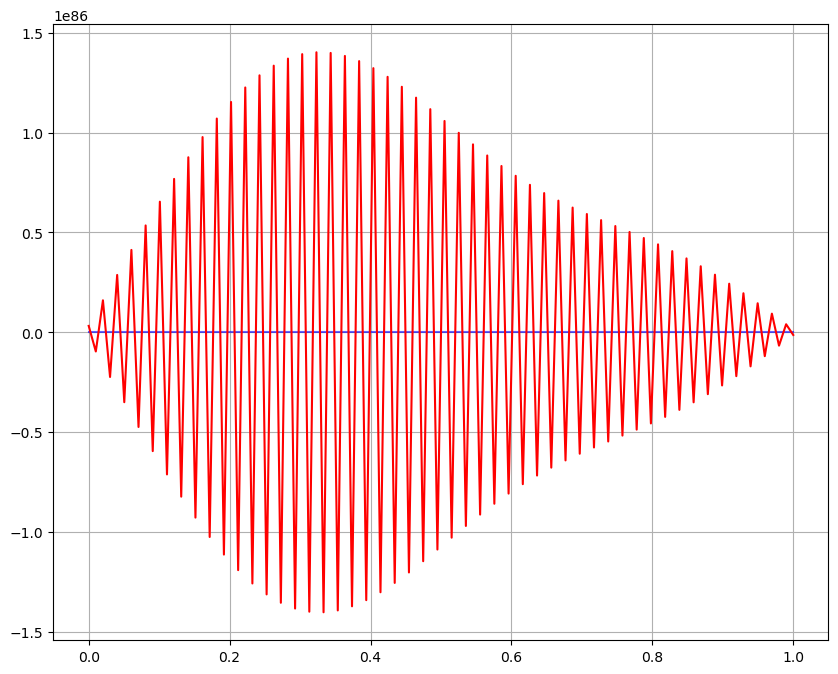

In [15]:
fig = plt.figure(figsize=(10,8))
plt.plot(t, y, 'b-', label = 'with noise', alpha = .6)
plt.plot(t, y_non_noise, 'r-', label = 'without noise')
plt.grid(True)

répondre à la question 6

#### Question 7 :

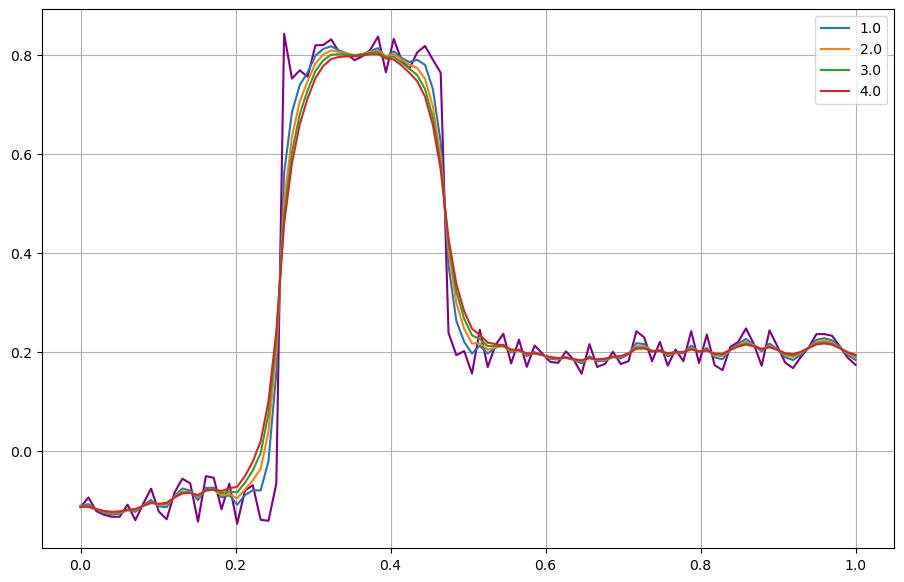

In [16]:
lamb = np.linspace(1,4,4)
alpha = 0.1
fig = plt.figure(figsize = (11,7))
plt.plot(t,y, color = 'purple')
for l in lamb:
    lamb = l
    y_non_noise, it, cvg = gradient_met(grad_f, x0, alpha, 1e-5, 500)
    plt.plot(t, y_non_noise, label = l)
plt.grid(True)
plt.legend()
plt.show()

Observations : On remarque que plus lambda augmente, moins il y a de bruit.

#### Question 8 :

Pour calculer le gradient de cette nouvelle fonction $f_{\mu}$, nous allons raisonner avec les dérivées partielles, une à une.
Premièrement, ces dérivées partielles existent, (à développer).

Calcul des dérivées partielles:

soit $l \in \{2,...,N-1\}$. Alors :
$$
\frac{\partial f(x)}{\partial x_l} = x_l - y_l - \lambda \frac{x_{l+1} - x_l}{\sqrt{(x_{l+1}-x_l)^2+\mu^2}} + \lambda\frac{x_l-x_{l-1}}{\sqrt{(x_l-x_{l-1})^2+\mu^2}}
$$
Pour $l = N$ :
$$
\frac{\partial f(x)}{\partial x_N} = x_N - y_N + \lambda \frac{x_{N} - x_{N-1}}{\sqrt{(x_{N}-x_{N-1})^2+\mu^2}}
$$
Enfin, pour $l=1$:
$$
\frac{\partial f(x)}{\partial x_1} = x_1 - y_1 - \lambda \frac{x_{2} - x_{1}}{\sqrt{(x_{2}-x_{1})^2+\mu^2}}
$$
Au total, on obtient : 
$$
\nabla f_{\mu}(x) = \bigg(\frac{\partial f(x)}{\partial x_i} \bigg)_{i=1,...,N}.
$$

In [17]:
def grad_f_mu(x, mu):
    
    N = x.shape[0]
    gradf = np.zeros(N)
    
    for i in range(1,N-1):
        gradf[i] = x[i] - y[i] - lamb*(x[i+1]-x[i])/np.sqrt((x[i+1]-x[i])**2 + mu**2) + lamb*(x[i]-x[i-1])/np.sqrt((x[i]-x[i-1])**2 + mu**2)
    
    gradf[0] = x[0] - y[0] - lamb*(x[1]-x[0])/np.sqrt((x[1]-x[0])**2 + mu**2)
    gradf[N-1] = x[N-1] - y[N-1] + lamb*(x[N-1]-x[N-2])/np.sqrt((x[N-1]-x[N-2])**2 + mu**2)
    
    return gradf

#### Question 9 :

In [18]:
def gradient_met_mu(grad_f_mu, x0, mu, alpha, eps, Nmax):

    """
    grad_f a function that compute the gradient of f given x
    x0 the initialization
    alpha the step (constant)
    eps the precision (stop criteria)
    Nmax the maximum number of iterations
    """
    
    x = x0
    gradf = grad_f_mu(x, mu)
    iters = 0
    
    while np.linalg.norm(gradf) > eps and iters < Nmax: #critere d’arret sur le gradient
        x = x - alpha*gradf
        gradf = grad_f_mu(x, mu)
        iters += 1
    
    cvg = np.linalg.norm(gradf) <= eps #on verifie si on a convergence
    
    return x, iters, cvg # returns
                    # x the minimum,
                    # n the number of iterations
                    # cvg a boolean that indicates if the algorithm has converged

In [19]:
x0 = y
alpha1 = 0.1
alpha2 = 0.001
lamb = 1
y_non_noise, n1, cvg1 = gradient_met(grad_f, x0, alpha1, 1e-8, 500)
y_new, n2, cvg2 = gradient_met_mu(grad_f_mu, x0, 1e-2, alpha2, 1e-5,500)
n1,n2

(143, 500)

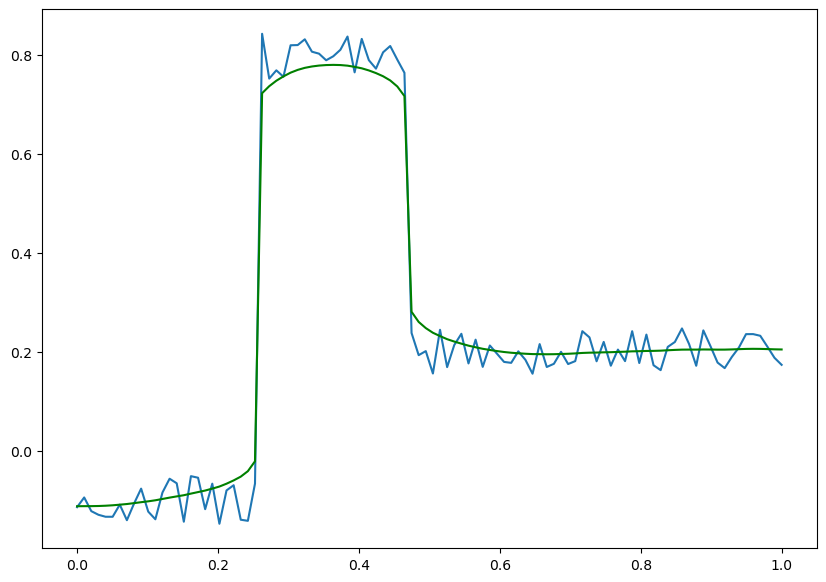

In [20]:
#plt.plot(t,y_non_noise, 'b-')
fig = plt.figure(figsize=(10,7))
plt.plot(t,y)
plt.plot(t,y_new, 'g-')

La deuxième méthode lisse beaucoup plus le signal, mais ne converge pas.

#### Question 10 :

In [21]:
def BBstep(grad_f, x, xm1) :
    """
    grad_f a function that compute the gradient of f given x
    x0 the initialization point x_0
    xm1 the initialization point x_-1
    """
    bbs = (x-xm1).T@(grad_f(x)-grad_f(xm1))/np.linalg.norm(grad_f(x)-grad_f(xm1))**2
    
    return bbs # the step in the method of Barzilai-Borwein

In [22]:
def barzilai_borwein(grad_f, x0, eps, Nmax):
    """
    grad_f a function that compute the gradient of f given x
    x0 the initialization
    eps the precision (stop criteria)
    Nmax the maximum number of iterations
    """
    x = x0
    xm1 = -x0
    
    gradf = grad_f(x)
    iters = 0
    alpha = BBstep(grad_f, x, xm1)
    
    while np.linalg.norm(gradf) > eps and iters < Nmax: #critere d’arret sur le gradient
        xm1 = x
        x = xm1 - alpha*grad_f(xm1)
        gradf = grad_f(x)
        alpha = BBstep(grad_f, x, xm1)
        iters += 1
    
    cvg = np.linalg.norm(gradf) <= eps #on verifie si on a convergence
    n = iters
    
    return x, n, cvg # returns
                    # x the minimum,
                    # n the number of iterations
                    # cvg a boolean that indicates if the algorithm has converged

In [23]:
x0 = y
lamb = 4

y_1, n3, cvg3 = barzilai_borwein(grad_f, x0, 1e-8, 100)
n3, cvg3

(49, True)

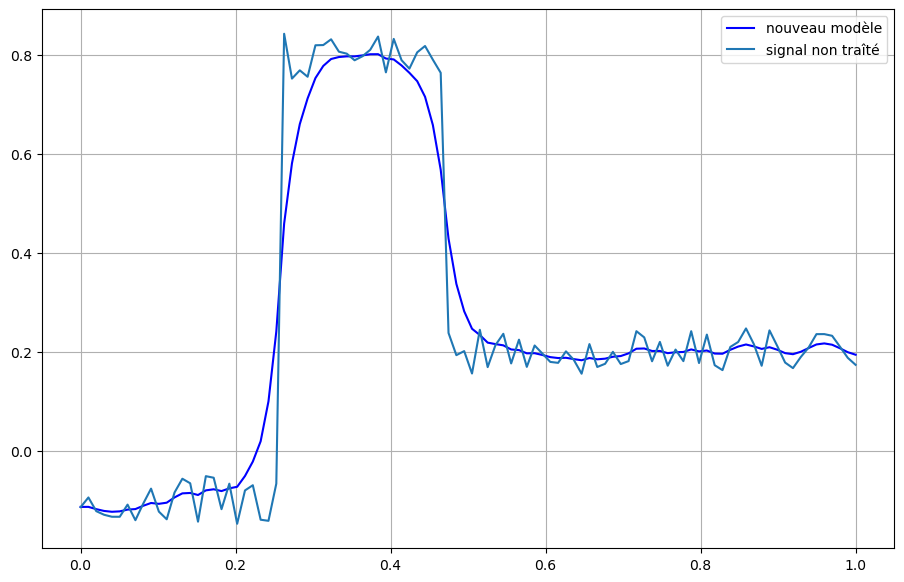

In [24]:
fig = plt.figure(figsize = (11,7))
plt.plot(t,y_1,'b-', label = 'nouveau modèle')
plt.plot(t,y, label = 'signal non traîté')
plt.grid(True)
plt.legend()

On remarque que cette méthode est beaucoup plus efficace que les précédentes, en comparant le nombre d'itérations éxécutées par exemple, et le signal est mieux traîté.

# Exercice 2 : Remove noise from an image

In [39]:
imread?

Signature: imread(fname, format=None)
Docstring:
Read an image from a file into an array.

.. note::

    This function exists for historical reasons.  It is recommended to
    use `PIL.Image.open` instead for loading images.

Parameters
----------
fname : str or file-like
    The image file to read: a filename, a URL or a file-like object opened
    in read-binary mode.

    Passing a URL is deprecated.  Please open the URL
    for reading and pass the result to Pillow, e.g. with
    ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
format : str, optional
    The image file format assumed for reading the data.  The image is
    loaded as a PNG file if *format* is set to "png", if *fname* is a path
    or opened file with a ".png" extension, or if it is an URL.  In all
    other cases, *format* is ignored and the format is auto-detected by
    `PIL.Image.open`.

Returns
-------
`numpy.array`
    The image data. The returned array has shape

    - (M, N) for grayscale images.
 

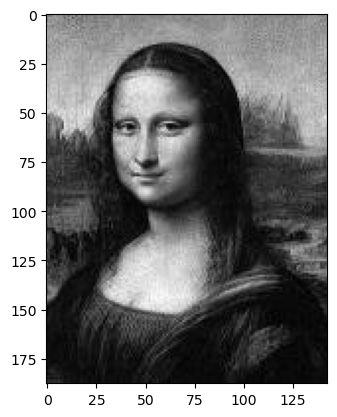

In [44]:
from matplotlib.image import imread
image = imread("visual studio opti/Grey_Mona_lisa.jpg")

imageArray = np.asarray(image, dtype = np.float64)[:,:,0].copy()/255. #convert to array

#plot with grey levels
plt.imshow(imageArray, cmap='gray')

g=imageArray.copy()

#### Question 1 :

In [85]:
def delta_x(m): # like the matrix D above, in the first exercise, but for the x direction
    delt = -1*np.eye(m)

    for i in range(m-1):
            delt[i,i+1] = 1
    delt[m-1,m-1] = 0
    return delt    

In [86]:
delta_x(5)

array([[-1.,  1., -0., -0., -0.],
       [-0., -1.,  1., -0., -0.],
       [-0., -0., -1.,  1., -0.],
       [-0., -0., -0., -1.,  1.],
       [-0., -0., -0., -0.,  0.]])

In [87]:
def delta_y(m): return delta_x(m).T # same as above, but for the y direction

In [88]:
m = g.shape[0]
n = g.shape[1]

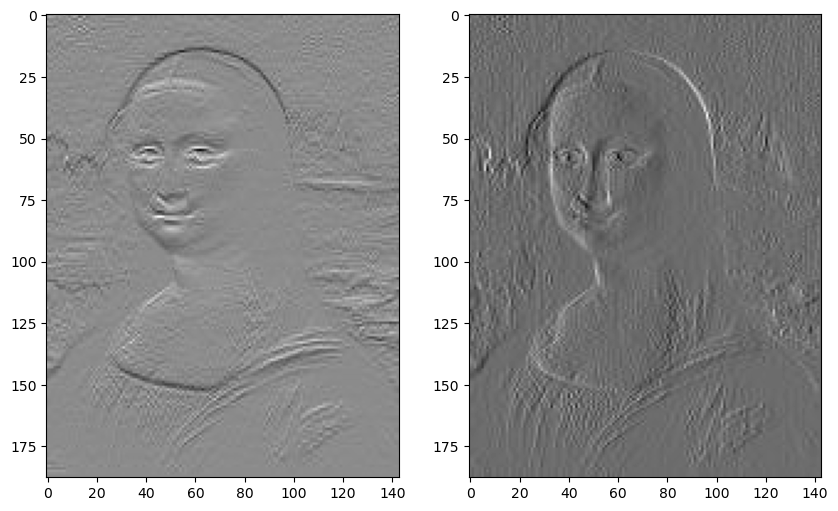

In [73]:
fig = plt.figure(figsize=(10,25))
plt.subplot(1,2,1)
plt.imshow(delta_x(m)@g,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(g@delta_y(n),cmap='gray')

#### Question 2 :

In [91]:
def M_mat(delt_x, delt_y,u): return np.sqrt((delt_x(u.shape[0]))**2 + (delt_y(u.shape[1]))**2)
M_mat(delta_x, delta_y, g)

ValueError: operands could not be broadcast together with shapes (188,188) (143,143) 

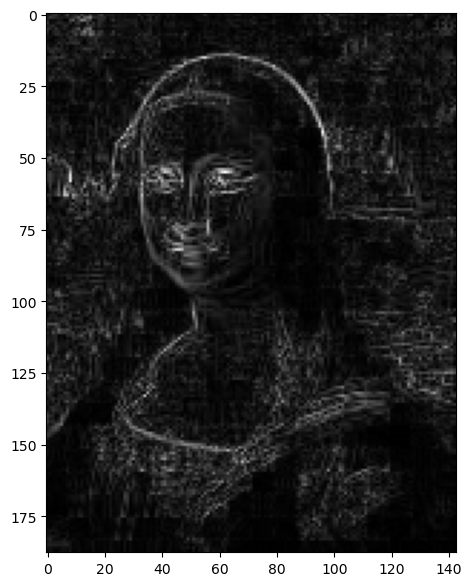

In [75]:
fig = plt.figure(figsize=(12,7))
plt.imshow(norm_grad(delta_x, delta_y, g), cmap='gray')

##### Remarques :
Après traîtement du dessus, l'image s'affiche en noir et blanc, il n'y a plus de nuances de gris.  

#### Question 3 :

In [44]:
def grad_J(v): # Définissons ensuite le gradient de J   
    first_term = v-g
    sec_term = lamb*norm_grad(der_x(v), der_y(v))**2
    
    return first_term + sec_term

In [63]:
def grad_met_im(grad_J, x0, alpha, eps, Nmax): #gradient method for image g
    """
    grad_f a function that compute the gradient of f given x
    x0 the initialization
    eps the precision (stop criteria)
    Nmax the maximum number of iterations
    """
    x = x0 #initialization
    gradj = grad_J(x) #initialization
    iters = 0 #initialization
    
    while np.linalg.norm(gradj) > eps and iters < Nmax: #critere d’arret sur le gradient
        x = x - gradj*alpha   #on fait une iteration
        gradj = grad_J(x) #on recalcule le gradient
        iters += 1 #on incremente le nombre d'iterations
    
    cvg = np.linalg.norm(gradj) <= eps #on verifie si on a convergence
    print(np.linalg.norm(gradj))
    return x, iters, cvg # returns
                    # x the minimum,
                    # n the number of iterations
                    # cvg a boolean that indicates if the algorithm has converged

In [67]:
lamb = 0.5
x, n, cvg = grad_met_im(grad_J, g, 0.1, 1e-2, 500)

nan


<ipython-input-32-79cc75b6f0f8>:1: RuntimeWarning: overflow encountered in square
  def norm_grad(der_x, der_y): return np.sqrt(der_x**2 + der_y**2)
<ipython-input-29-a6f9cdf2136f>:7: RuntimeWarning: invalid value encountered in double_scalars
  u_der[i,j] = u[i+1,j] - u[i,j]
<ipython-input-44-2d75c6632afa>:5: RuntimeWarning: invalid value encountered in add
  return first_term + sec_term


c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:449: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:454: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact


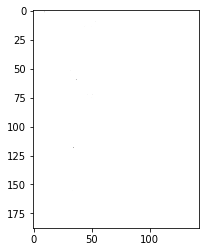

In [49]:
plt.imshow(x, cmap='gray')